<a href="https://colab.research.google.com/github/SAIRAALMAS88/SAIRAALMAS88/blob/main/CV_1TL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Image Classification with Transfer Learning


In [3]:
! pip install tensorflow keras

In [4]:
# Importing essential libraries

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [6]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load MobileNetV2 without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(num_classes, activation='softmax')(x)  # Softmax layer for classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
# Resize images to match MobileNetV2 input size
x_train_resized = tf.image.resize(x_train, (96, 96))
x_test_resized = tf.image.resize(x_test, (96, 96))

# Train the model
history = model.fit(
    x_train_resized, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_test_resized, y_test)
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.7129 - loss: 0.8598 - val_accuracy: 0.7832 - val_loss: 0.6128
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.8124 - loss: 0.5363 - val_accuracy: 0.7993 - val_loss: 0.5731
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8411 - loss: 0.4524 - val_accuracy: 0.8175 - val_loss: 0.5514
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8618 - loss: 0.3897 - val_accuracy: 0.8127 - val_loss: 0.5587
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8829 - loss: 0.3283 - val_accuracy: 0.8196 - val_loss: 0.5700
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8994 - loss: 0.2774 - val_accuracy: 0.8057 - val_loss: 0.6555
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.9166 - loss: 0.2299 - val_accuracy: 0.8046 - val_loss: 0.7063
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.9260 -

In [8]:
# Unfreeze some layers in the base model
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Recompile the model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(
    x_train_resized, y_train,
    batch_size=32,
    epochs=5,
    validation_data=(x_test_resized, y_test)
)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 21ms/step - accuracy: 0.6704 - loss: 2.7579 - val_accuracy: 0.7849 - val_loss: 1.3115
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7876 - loss: 1.0898 - val_accuracy: 0.7758 - val_loss: 1.2275
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8142 - loss: 0.7484 - val_accuracy: 0.7825 - val_loss: 1.0765
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.8391 - loss: 0.5575 - val_accuracy: 0.7901 - val_loss: 0.9716
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.8678 - loss: 0.4166 - val_accuracy: 0.7954 - val_loss: 0.8926


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step


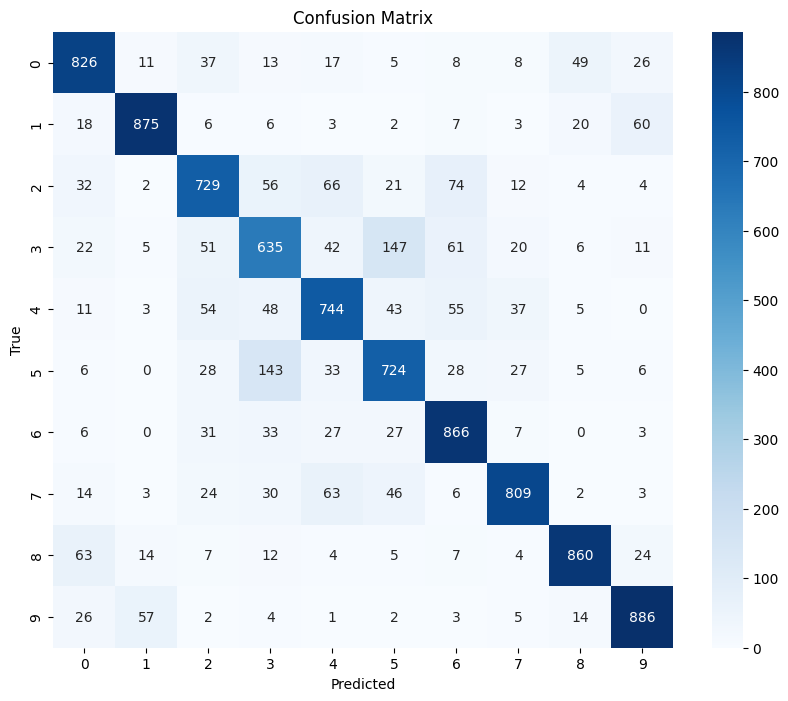

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7982 - loss: 0.8845
Test Accuracy: 79.54%


In [9]:
#  Evaluate the Model

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(x_test_resized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
test_loss, test_accuracy = model.evaluate(x_test_resized, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")